In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonalds-nutrition-dataset/mcdonaldata.csv


## This exercise is to learn Python and SQL operations for writing/reading csv data into/from DB table and working on the data

Load CSV to SQLite3 with Pandas.

The data is stored in .csv file

In [2]:
import sqlite3

data = pd.read_csv('/kaggle/input/mcdonalds-nutrition-dataset/mcdonaldata.csv') # uploaded from Kaggle datasets

In [3]:
data

,Unnamed: 0,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
0,0,McVeggie Burger,168,402,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,regular
1,1,McAloo Tikki Burger,146,339,8.50,11.31,4.27,0.20,1.47,5.27,7.05,4.07,545.34,regular
2,2,McSpicy Paneer Burger,199,652,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,regular
3,3,Spicy Paneer Wrap,250,674,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,regular
4,4,American Veg Burger,177,512,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,Tomato Ketchup Sachets,8,11.23,0.08,23.45,0.38,0.25,0.08,2.63,2.33,1.64,414.71,condiments
137,137,Maple Syrup,3,86.4,0.00,0.00,0.00,0.40,0.30,21.60,16.20,5.34,71.05,condiments
138,138,Cheese Slice,14,51.03,3.06,3.99,0.00,0.00,13.43,0.72,0.54,0.00,15.00,condiments
139,139,Sweet Corn,40,45.08,1.47,1.00,2.89,0.01,2.00,7.55,2.54,0.00,178.95,condiments


In [4]:
# connection to the db
conn = sqlite3.connect('McDonalds.db')
# save contents of the menu to DB
data.to_sql('MCDONALDS_NUTRITION', conn)

141

In [5]:
# test whether we can insert rows to the tabla of MCDONALDS_NUTRITION
df = pd.read_sql("SELECT * FROM MCDONALDS_NUTRITION", conn)
df

,index,Unnamed: 0,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
0,0,0,McVeggie Burger,168,402,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,regular
1,1,1,McAloo Tikki Burger,146,339,8.50,11.31,4.27,0.20,1.47,5.27,7.05,4.07,545.34,regular
2,2,2,McSpicy Paneer Burger,199,652,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,regular
3,3,3,Spicy Paneer Wrap,250,674,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,regular
4,4,4,American Veg Burger,177,512,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,136,Tomato Ketchup Sachets,8,11.23,0.08,23.45,0.38,0.25,0.08,2.63,2.33,1.64,414.71,condiments
137,137,137,Maple Syrup,3,86.4,0.00,0.00,0.00,0.40,0.30,21.60,16.20,5.34,71.05,condiments
138,138,138,Cheese Slice,14,51.03,3.06,3.99,0.00,0.00,13.43,0.72,0.54,0.00,15.00,condiments
139,139,139,Sweet Corn,40,45.08,1.47,1.00,2.89,0.01,2.00,7.55,2.54,0.00,178.95,condiments


View the summary statistics of the data

In [6]:
df.describe(include = 'all')

,index,Unnamed: 0,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
count,141.000000,141.000000,141,141,141,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141
unique,NaN,NaN,141,120,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,McVeggie Burger,299,12.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mccafe
freq,NaN,NaN,1,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48
mean,70.000000,70.000000,NaN,NaN,NaN,7.493333,10.060355,5.000099,1.108865,26.321128,30.770851,15.409504,10.336950,362.918809,NaN
std,40.847277,40.847277,NaN,NaN,NaN,8.336949,10.435455,4.898097,7.319814,50.348006,20.664969,15.674007,14.283388,477.792553,NaN
min,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,35.000000,35.000000,NaN,NaN,NaN,0.650000,0.460000,0.330000,0.070000,1.470000,15.630000,2.280000,0.000000,41.990000,NaN
50%,70.000000,70.000000,NaN,NaN,NaN,4.790000,7.770000,4.270000,0.150000,8.390000,29.880000,9.160000,3.640000,150.900000,NaN
75%,105.000000,105.000000,NaN,NaN,NaN,10.880000,14.160000,7.280000,0.250000,31.110000,45.390000,26.950000,19.230000,530.540000,NaN


**Which food item has maximum sodium content?**

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the mar

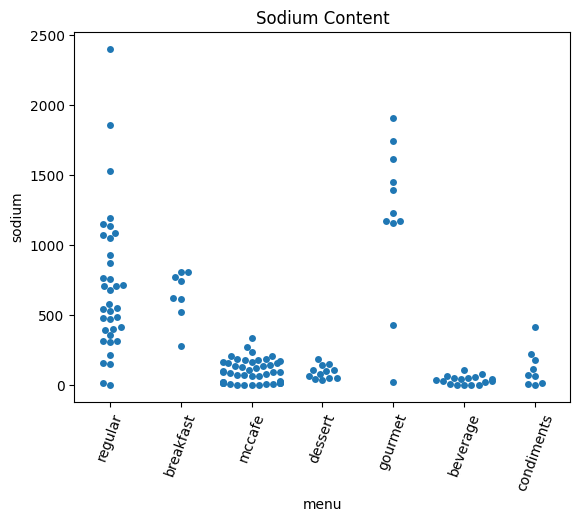

In [8]:
plot = sns.swarmplot(x="menu", y="sodium", data=df)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Sodium Content')
plt.show()

In [9]:
df['sodium'].describe()

count     141.000000
mean      362.918809
std       477.792553
min         0.000000
25%        41.990000
50%       150.900000
75%       530.540000
max      2399.490000
Name: sodium, dtype: float64

In [10]:
df['sodium'].idxmax()

18

In [11]:
df.at[18, 'item']

'Ghee Rice with Mc Spicy Fried Chicken 1 pc'

**Further Data Exploration using Scatter Plots**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


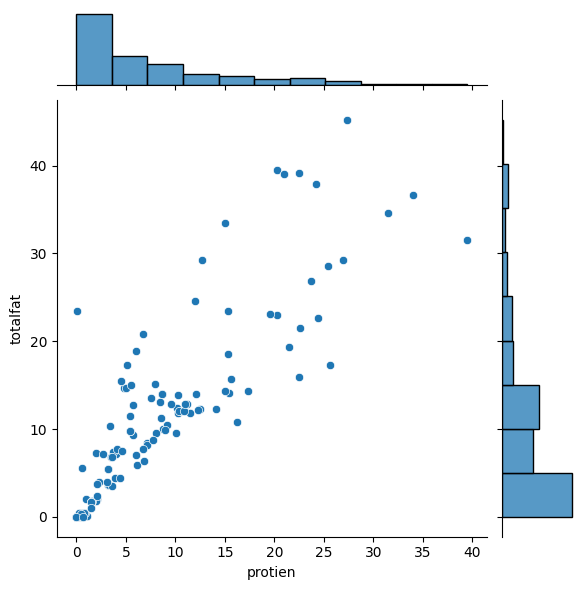

In [12]:
plot = sns.jointplot(x = "protien", y = "totalfat", data = df)

**Further Data Exploration using Box Plots**

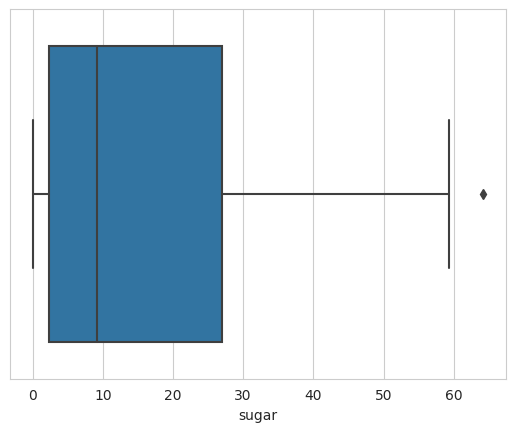

In [13]:
plot = sns.set_style("whitegrid")
ax = sns.boxplot(x=df["sugar"])